<a href="https://colab.research.google.com/github/Us9r/vault/blob/main/vault/indomaretv3/Untitled21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preparation
* Data Cleaning: Memilih fitur yang relevan, menangani missing values, dan data duplikat.
* Data Integration: Menggabungkan data populasi berdasarkan lokasi toko dan menganalisis keberadaan kompetitor (Alfamart) terdekat.
* Data Transformation: Menangani inconsistent values dan melakukan normalisasi data menggunakan MinMaxScaler.
* Data Selection: Memilih fitur yang akan digunakan dalam proses clustering (totalScore, reviewsCount, Jiwa/km², nearby_alfamart, second_nearby_alfamart)

#### load dataset

import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.gridspec as gridspec
import plotly.express as px
from geopy.distance import geodesic
from sklearn.metrics import silhouette_score

In [2]:
df_indomaret = pd.read_csv('https://raw.githubusercontent.com/Us9r/vault/main/indomaretv3/indomaretv2_copy.csv')
df_alfamart = pd.read_csv('https://raw.githubusercontent.com/Us9r/vault/main/indomaretv3/alfamartv3_copy.csv')
df_populasi = pd.read_excel('https://raw.githubusercontent.com/Us9r/vault/main/indomaretv3/padatan_penduduk.xlsx')

Assesing dataset

In [3]:
df_indomaret.head(3)

,additionalInfo/Accessibility/0/Wheelchair accessible entrance,additionalInfo/Accessibility/0/Wheelchair accessible parking lot,additionalInfo/Accessibility/0/Wheelchair accessible restroom,additionalInfo/Accessibility/0/Wheelchair accessible seating,additionalInfo/Accessibility/0/Wheelchair-accessible car park,additionalInfo/Accessibility/0/Wheelchair-accessible entrance,additionalInfo/Accessibility/1/Wheelchair accessible parking lot,additionalInfo/Accessibility/1/Wheelchair accessible seating,additionalInfo/Accessibility/1/Wheelchair-accessible entrance,additionalInfo/Amenities/0/Gender-neutral restroom,...,searchPageUrl,searchString,state,street,subTitle,temporarilyClosed,title,totalScore,url,website
0,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,...,https://www.google.com/maps/search/toko%20Indo...,toko Indomaret,South Sumatra,"2QH9+7WC, Jl. Dr. M. Isa",NaN,False,Indomaret | Duku,3.7,https://www.google.com/maps/search/?api=1&quer...,http://indomaret.co.id/
1,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,...,https://www.google.com/maps/search/toko%20Indo...,toko Indomaret,South Sumatra,Jl. R. E. Martadinata No.18D,NaN,False,Indomaret R E Martadinata,4.3,https://www.google.com/maps/search/?api=1&quer...,http://www.indomaret.co.id/
2,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,...,https://www.google.com/maps/search/toko%20Indo...,toko Indomaret,South Sumatra,Jl. Slamet Riady No.1557,NaN,False,Indomaret boom baru,3.8,https://www.google.com/maps/search/?api=1&quer...,https://indomaret.co.id/


In [4]:
print(df_indomaret.columns.values)

['additionalInfo/Accessibility/0/Wheelchair accessible entrance'
 'additionalInfo/Accessibility/0/Wheelchair accessible parking lot'
 'additionalInfo/Accessibility/0/Wheelchair accessible restroom'
 'additionalInfo/Accessibility/0/Wheelchair accessible seating'
 'additionalInfo/Accessibility/0/Wheelchair-accessible car park'
 'additionalInfo/Accessibility/0/Wheelchair-accessible entrance'
 'additionalInfo/Accessibility/1/Wheelchair accessible parking lot'
 'additionalInfo/Accessibility/1/Wheelchair accessible seating'
 'additionalInfo/Accessibility/1/Wheelchair-accessible entrance'
 'additionalInfo/Amenities/0/Gender-neutral restroom'
 'additionalInfo/Amenities/0/Restroom'
 'additionalInfo/Amenities/1/Restroom'
 'additionalInfo/Atmosphere/0/Casual' 'additionalInfo/Atmosphere/1/Cozy'
 'additionalInfo/Atmosphere/2/Quiet' 'additionalInfo/Atmosphere/2/Trendy'
 'additionalInfo/Children/0/Good for kids'
 "additionalInfo/Children/1/Kids' menu"
 'additionalInfo/Crowd/0/College students' 'addit

In [5]:
df_alfamart.head(3)

,additionalInfo/Aksesibilitas/0/Pintu masuk khusus pengguna kursi roda,additionalInfo/Aksesibilitas/0/Tempat parkir khusus pengguna kursi roda,additionalInfo/Aksesibilitas/1/Tempat parkir khusus pengguna kursi roda,additionalInfo/Anak-anak/0/Cocok untuk anak-anak,additionalInfo/Anak-anak/1/Menu anak,additionalInfo/Fasilitas/0/Toilet,additionalInfo/Fasilitas/1/Wi-Fi,additionalInfo/Fasilitas/2/Wi-Fi Gratis,additionalInfo/Keunggulan/0/Sayur mayur dan buah segar,additionalInfo/Opsi layanan/0/Ambil di toko,...,scrapedAt,searchPageUrl,searchString,state,street,temporarilyClosed,title,totalScore,url,website
0,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-04-19T04:04:05.976Z,https://www.google.com/maps/search/Toko%20alfa...,Toko alfamart,Sumatera Selatan,"2MVP+FGC, Klp Jl. Lebung Permai",False,Alfamart Lebung Permai Talang kelapa,4.4,https://www.google.com/maps/search/?api=1&quer...,NaN
1,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-04-19T04:04:05.978Z,https://www.google.com/maps/search/Toko%20alfa...,Toko alfamart,Sumatera Selatan,Komplek Citra Grand City Rt. 12 Rw. 05 Ds. Ala...,False,Alfamart Citra Grand City,4.3,https://www.google.com/maps/search/?api=1&quer...,NaN
2,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-04-19T04:04:05.978Z,https://www.google.com/maps/search/Toko%20alfa...,Toko alfamart,Sumatera Selatan,3M6Q+5CC,False,Alfamart simpang talang kelapa,4.1,https://www.google.com/maps/search/?api=1&quer...,NaN


In [6]:
df_populasi.head(3)

,Kecamatan,Male,Female,Jumlah Penduduk,Luas,Jiwa/km²
0,Ilir Barat II,35121,34750,69871,4.18,16715
1,Gandus,42484,41398,83882,49.64,1689
2,Seberang Ulu I,48601,47457,96058,6.08,15799


### a. Data cleaning

#### Selecting feature
karena data hasil scraping memiliki banyak fitur yang tidak diinginkan, maka hanya fitur yang dibutuhkan akan diambil

In [7]:
df_indomaret = df_indomaret[['title','totalScore','reviewsCount','location/lat',
 'location/lng', 'neighborhood','url']]

In [8]:
df_alfamart = df_alfamart[['title','totalScore','reviewsCount','location/lat',
 'location/lng', 'neighborhood','url']]

#### Drop missing values

In [9]:
df_indomaret.isnull().sum()

,0
title,0
totalScore,42
reviewsCount,0
location/lat,0
location/lng,0
neighborhood,0
url,0


In [10]:
df_alfamart.isnull().sum()

,0
title,0
totalScore,19
reviewsCount,0
location/lat,0
location/lng,0
neighborhood,0
url,0


In [11]:
df_indomaret = df_indomaret.dropna()
df_alfamart = df_alfamart.dropna()

#### Identify duplicated values

In [12]:
df_indomaret.duplicated().sum()

np.int64(0)

In [13]:
df_alfamart.duplicated().sum()

np.int64(0)

### b. Data integration
df_repaired

#### Merging population data
integrating df_indomaret dan df_populasi untuk assign nilai populasi berdasarkan kecamatan lokasi toko Indomaret

In [14]:
df_indomaret['neighborhood'].head(3) #review kolom neighborhood

,neighborhood
0,"Duku, Ilir Timur II"
1,"3 Ilir, Ilir Timur II"
2,"Lawang Kidul, Ilir Timur II"


In [15]:
# memisahkan string pada kolom berdasarkan koma (','), lalu pilih hanya elemen terakhir dari sub string, terakhir hapus white space dengan str.strip()
df_indomaret['neighborhood'] = df_indomaret['neighborhood'].str.split(',').str[-1].str.strip()

In [16]:
df_indomaret['neighborhood'].head(3)

,neighborhood
0,Ilir Timur II
1,Ilir Timur II
2,Ilir Timur II


In [17]:
df_populasi = df_populasi.drop(columns=["Male","Female","Jumlah Penduduk","Luas"])

In [18]:
df_merged = pd.merge(df_indomaret, df_populasi, left_on='neighborhood', right_on='Kecamatan', how='left')

In [19]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         334 non-null    object 
 1   totalScore    334 non-null    float64
 2   reviewsCount  334 non-null    int64  
 3   location/lat  334 non-null    float64
 4   location/lng  334 non-null    float64
 5   neighborhood  334 non-null    object 
 6   url           334 non-null    object 
 7   Kecamatan     324 non-null    object 
 8   Jiwa/km²      324 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 23.6+ KB


terdapat missing values, terjadi karena terdapat ketidakcocokan pada kolom sehingga membutuhkan pengecekan lebih lanjut.

In [20]:
kecamatan_tidak_cocok = df_merged[df_merged['Kecamatan'].isnull()]
kecamatan_tidak_cocok

,title,totalScore,reviewsCount,location/lat,location/lng,neighborhood,url,Kecamatan,Jiwa/km²
16,Indomaret Perintis Kemerdekaan,3.7,11,-2.976085,104.778560,Palembang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
29,Indomaret Akbp Cek Agus,4.1,23,-2.956099,104.770100,Palembang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
89,Indomaret H Sanusi,2.9,28,-2.948917,104.742522,Palembang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
147,Indomaret Talang Betutu Lama,3.6,8,-2.900536,104.674775,Talang Kelapa,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
222,ATM Bank BCA 6898-Indomaret Sukabangun,3.0,1,-2.935427,104.735255,Palembang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
228,Indomaret,1.0,1,-2.935543,104.820361,Banyuasin I,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
231,Indomaret,2.0,4,-2.917939,104.821436,Banyuasin I,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
255,Indomaret Merdeka 2,2.5,2,-2.990711,104.756322,Palembang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
291,Indomaret SP1,4.5,2,-2.928452,104.768923,Kecamatan Sungai Menang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
319,Indomaret Talangputri,4.5,68,-3.015459,104.823720,Rambutan,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN


In [21]:
populasi_tidak_cocok = df_merged[df_merged['Jiwa/km²'].isnull()]
populasi_tidak_cocok

,title,totalScore,reviewsCount,location/lat,location/lng,neighborhood,url,Kecamatan,Jiwa/km²
16,Indomaret Perintis Kemerdekaan,3.7,11,-2.976085,104.778560,Palembang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
29,Indomaret Akbp Cek Agus,4.1,23,-2.956099,104.770100,Palembang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
89,Indomaret H Sanusi,2.9,28,-2.948917,104.742522,Palembang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
147,Indomaret Talang Betutu Lama,3.6,8,-2.900536,104.674775,Talang Kelapa,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
222,ATM Bank BCA 6898-Indomaret Sukabangun,3.0,1,-2.935427,104.735255,Palembang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
228,Indomaret,1.0,1,-2.935543,104.820361,Banyuasin I,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
231,Indomaret,2.0,4,-2.917939,104.821436,Banyuasin I,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
255,Indomaret Merdeka 2,2.5,2,-2.990711,104.756322,Palembang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
291,Indomaret SP1,4.5,2,-2.928452,104.768923,Kecamatan Sungai Menang,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN
319,Indomaret Talangputri,4.5,68,-3.015459,104.823720,Rambutan,https://www.google.com/maps/search/?api=1&quer...,NaN,NaN


beberapa nilai neighborhood dan kecamatan tidak match sehingga diperlukan assign manual

In [22]:
# Export to Excel and download
df_merged.to_excel('df_merged_repair.xlsx', index=False)

Load ulang df_merged_repaired

In [23]:
df_repaired = pd.read_excel("https://raw.githubusercontent.com/Us9r/vault/main/indomaretv3/df_merged_repaired.xlsx")

In [24]:
df_repaired.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         333 non-null    object 
 1   totalScore    333 non-null    float64
 2   reviewsCount  333 non-null    int64  
 3   location/lat  333 non-null    float64
 4   location/lng  333 non-null    float64
 5   neighborhood  333 non-null    object 
 6   url           333 non-null    object 
 7   Kecamatan     333 non-null    object 
 8   Jiwa/km²      333 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 23.5+ KB


#### Analyzing Nearby Alfamart Competition
menganalisis jumlah toko kompetitor (alfamart) terdekat dalam raidus 200 meter berdasarkan titik koordinat toko

In [25]:
def analyze_nearby_alfamart(df_repaired, df_alfamart, radius=200):
    df_repaired['nearby_alfamart'] = 0
    df_repaired['second_nearby_alfamart'] = 0

    for i in df_repaired.index: # Iterate using df_repaired index
        indomaret_coords = (df_repaired.loc[i, 'location/lat'], df_repaired.loc[i, 'location/lng'])
        nearby_alfamart_count = 0
        nearby_alfamart_list = []

        for j in df_alfamart.index: # Iterate using df_alfamart index
            alfamart_coords = (df_alfamart.loc[j, 'location/lat'], df_alfamart.loc[j, 'location/lng'])
            distance = geodesic(indomaret_coords, alfamart_coords).meters

            if distance <= radius:
                nearby_alfamart_count += 1
                nearby_alfamart_list.append(j)

        if nearby_alfamart_count >= 1:
            df_repaired.loc[i, 'nearby_alfamart'] = 1
        if nearby_alfamart_count >= 2:
            df_repaired.loc[i, 'second_nearby_alfamart'] = 1

    return df_repaired

df_repaired = analyze_nearby_alfamart(df_repaired, df_alfamart)

In [26]:
df_repaired.describe()

,totalScore,reviewsCount,location/lat,location/lng,Jiwa/km²,nearby_alfamart,second_nearby_alfamart
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,4.101201,68.198198,-2.962894,104.751319,7764.591592,0.489489,0.102102
std,0.736443,109.840395,0.034395,0.034296,4405.387181,0.500642,0.303238
min,1.000000,1.000000,-3.068441,104.674775,1689.000000,0.000000,0.000000
25%,3.900000,6.000000,-2.989422,104.726136,4034.000000,0.000000,0.000000
50%,4.400000,20.000000,-2.965602,104.750449,5295.000000,0.000000,0.000000
75%,4.500000,91.000000,-2.936231,104.775846,12621.000000,1.000000,0.000000
max,5.000000,968.000000,-2.878969,104.846538,16715.000000,1.000000,1.000000


### c. Data Transformation

#### Inconsistent Value
Memastikan nilai telah konsisten dan hanya toko indomaret

In [27]:
# Filter baris judul yang tidak memiliki nilai str "Indomaret"
non_indomaret_rows = df_repaired[~df_repaired['title'].str.contains('Indomaret', case=False)]

# tampilkan
non_indomaret_rows

,title,totalScore,reviewsCount,location/lat,location/lng,neighborhood,url,Kecamatan,Jiwa/km²,nearby_alfamart,second_nearby_alfamart
40,Alfamart,3.5,11,-2.975543,104.761023,Ilir Timur I,https://www.google.com/maps/search/?api=1&quer...,Ilir Timur I,12765,1,1
41,Alfamart Veteran Raya,4.4,27,-2.975732,104.759773,Ilir Timur I,https://www.google.com/maps/search/?api=1&quer...,Ilir Timur I,12765,1,1
42,Alfamart Lingkaran Dempo,4.9,9,-2.980725,104.763133,Ilir Timur I,https://www.google.com/maps/search/?api=1&quer...,Ilir Timur I,12765,1,0
55,INDOMART Jl.TPH Sofyan Kanawas,4.9,11,-3.012128,104.688537,Gandus,https://www.google.com/maps/search/?api=1&quer...,Gandus,1689,0,0
72,Seblak 4 saudara yessi mama kembar,4.0,1,-3.046409,104.714347,Kertapati,https://www.google.com/maps/search/?api=1&quer...,Kertapati,2423,0,0
77,Indomart Tj. Barangan,4.5,32,-2.981825,104.712899,Ilir Barat I,https://www.google.com/maps/search/?api=1&quer...,Ilir Barat I,3853,1,0
117,Alfamart,4.4,126,-2.962230,104.727050,Ilir Barat I,https://www.google.com/maps/search/?api=1&quer...,Ilir Barat I,3853,1,0
118,Alfamart Macan Kumbang Raya,3.0,2,-2.974220,104.722985,Ilir Barat I,https://www.google.com/maps/search/?api=1&quer...,Ilir Barat I,3853,1,0
119,Alfamart,1.0,1,-2.963265,104.734432,Ilir Barat I,https://www.google.com/maps/search/?api=1&quer...,Ilir Barat I,3853,1,1
140,Point Coffee,4.5,127,-2.913697,104.684854,Sukarami,https://www.google.com/maps/search/?api=1&quer...,Sukarami,5295,1,0


terdapat inconsistent value

In [28]:
# Mengitung jumlah baris yang inconsistent value
row_count = len(non_indomaret_rows)
print(f"Number of rows with title not equal to 'indomaret': {row_count}")

Number of rows with title not equal to 'indomaret': 21


Baris cukup banyak sehingga diputuskan untuk memperbaiki kembali dengan manual

In [29]:
df_repaired.to_excel('df_repaired.xlsx', index=False)

Load kembali dataset yang telah di review

In [30]:
df_reviewed = pd.read_excel('https://raw.githubusercontent.com/Us9r/vault/main/indomaretv3/df_reviewed.xlsx')

#### Normalization
dengan MinMaxScaler

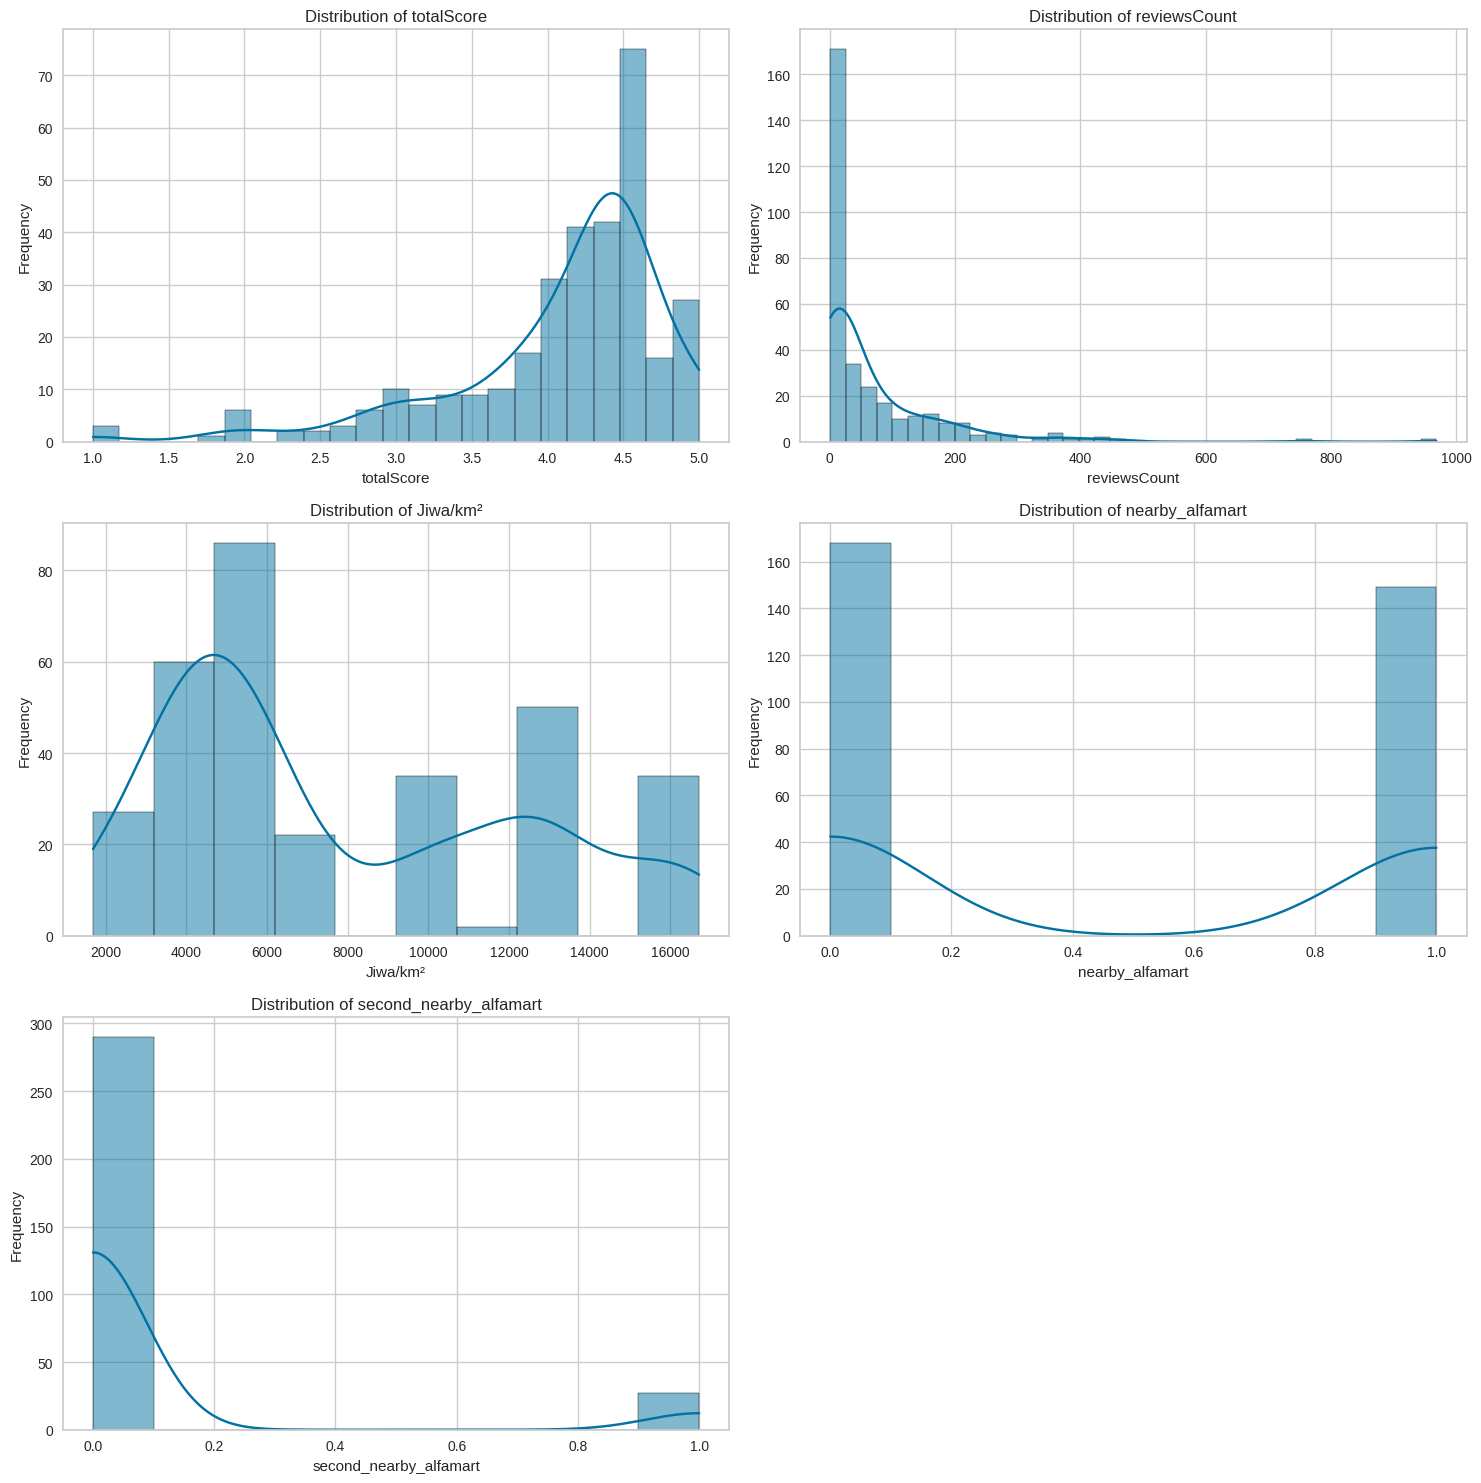

In [31]:
# Visualisasi awal distribusi data
feature_to_visualize = ['totalScore', 'reviewsCount', 'Jiwa/km²', 'nearby_alfamart', 'second_nearby_alfamart']

# Calculate the number of rows and columns for the subplots
num_cols = 2
num_rows = (len(feature_to_visualize) + num_cols - 1) // num_cols

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and create the plots
for i, col in enumerate(feature_to_visualize):
    if df_reviewed[col].dtype in ['int64', 'float64']:
        sns.histplot(df_reviewed[col], kde=True, ax=axes[i])
    else:
        sns.countplot(x=col, data=df_reviewed, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()


In [32]:
# prompt: terapkan minmaxscaler, lalu simpan hasilnya di df_normalized

# Select columns for normalization
columns_to_normalize = ['totalScore', 'reviewsCount', 'Jiwa/km²','nearby_alfamart','second_nearby_alfamart']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_normalized = df_reviewed.copy()  # Create a copy to avoid modifying the original DataFrame
df_normalized[columns_to_normalize] = scaler.fit_transform(df_reviewed[columns_to_normalize])

In [33]:
df_normalized.head(3)

,title,totalScore,reviewsCount,location/lat,location/lng,neighborhood,url,Kecamatan,Jiwa/km²,nearby_alfamart,second_nearby_alfamart
0,Indomaret | Duku,0.675,0.028956,-2.971803,104.769765,Ilir Timur II,https://www.google.com/maps/search/?api=1&quer...,Ilir Timur II,0.557833,1.0,0.0
1,Indomaret R E Martadinata,0.825,0.015512,-2.971179,104.783743,Ilir Timur II,https://www.google.com/maps/search/?api=1&quer...,Ilir Timur II,0.557833,0.0,0.0
2,Indomaret boom baru,0.700,0.028956,-2.979114,104.776126,Ilir Timur II,https://www.google.com/maps/search/?api=1&quer...,Ilir Timur II,0.557833,1.0,0.0


### d. Data Selection
memilih kolom untuk clustering
> ['totalScore', 'reviewsCount', 'Jiwa/km²','nearby_alfamart','second_nearby_alfamart']

In [34]:
df_normalized = df_normalized[['totalScore', 'reviewsCount', 'Jiwa/km²', 'nearby_alfamart', 'second_nearby_alfamart']]

# 2. Data Mining
* Elbow Method: Menentukan jumlah cluster optimal (k=3) menggunakan elbow method.
* K-Means Clustering: Menerapkan algoritma K-Means dengan k=3 untuk mengelompokkan data.
* Model Evaluation: Mengevaluasi model clustering menggunakan Silhouette Score (0.60).


### a. Elbow Method

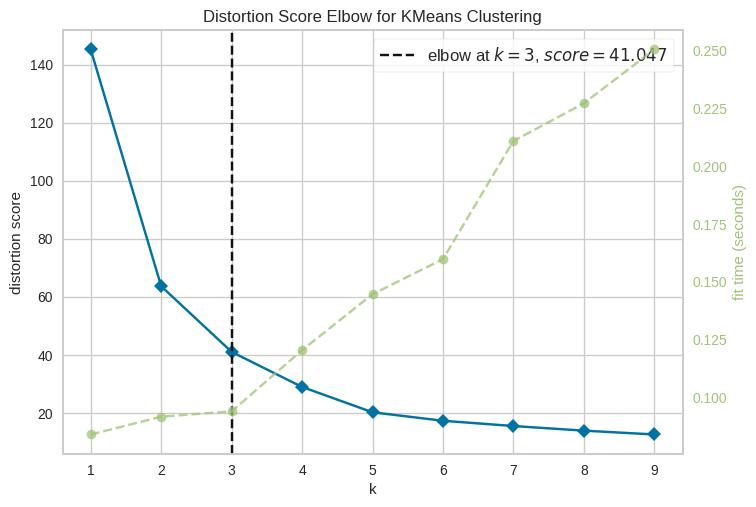

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(random_state=1, n_init=100)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_normalized)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

### b. K-Means

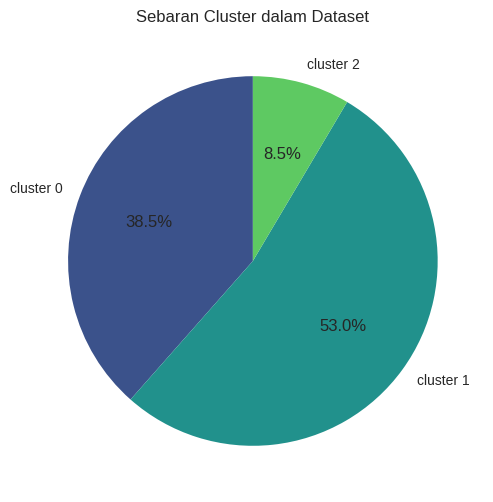

In [36]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(df_normalized)

clustered_df = df_reviewed.copy()
clustered_df['cluster'] = kmeans.labels_

# Hitung jumlah data per cluster
cluster_counts = clustered_df['cluster'].value_counts().sort_index()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts.values,
        labels=[f'cluster {cluster}' for cluster in cluster_counts.index],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("viridis", n_colors=len(cluster_counts)))
        #colors=plt.cm.viridis(cluster_counts.index / cluster_counts.index.max()))

# Atur judul
plt.title('Sebaran Cluster dalam Dataset')

# Tampilkan plot
plt.show()

In [37]:
print("Jumlah Data per Cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} data")

Jumlah Data per Cluster:
Cluster 0: 122 data
Cluster 1: 168 data
Cluster 2: 27 data


### c. Model Evaluation
struktur pengelompokkan yang 'Reasonable' telah ditemukan
>Silhouette Score: 0.6013939514842757

In [38]:
silhouette_avg = silhouette_score(df_normalized, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6013939514842757


# 3. Pattern/Model Evaluation
Menganalisis dan memvisualisasikan hasil clustering menggunakan scatter plot 3D, heatmap, parallel coordinates plot, dan parallel categories plot.

In [39]:
fig = px.scatter_3d(df_reviewed,
                    x='totalScore',
                    y='reviewsCount',
                    z='Jiwa/km²',
                    color=kmeans.labels_,  # Warna berdasarkan label
                    hover_data=['title', 'neighborhood']) # nilai saat hover

fig.update_layout(title='3D Scatter Plot of Indomaret Data',
                  scene = dict(
                      xaxis_title='Total Score',
                      yaxis_title='Reviews Count',
                      zaxis_title='Population Density (Jiwa/km²)'))

fig.show()

In [40]:
fig = px.scatter_3d(df_reviewed,
                    x='reviewsCount',
                    y='nearby_alfamart',
                    z='second_nearby_alfamart',
                    color=kmeans.labels_,
                    hover_data=['title', 'neighborhood'])

fig.update_layout(title='3D Scatter Plot of Indomaret Data',
                  scene = dict(
                      xaxis_title='Review Count',
                      yaxis_title='Nearby Alfamart',
                      zaxis_title='Second Nearby Alfamart'))

fig.show()

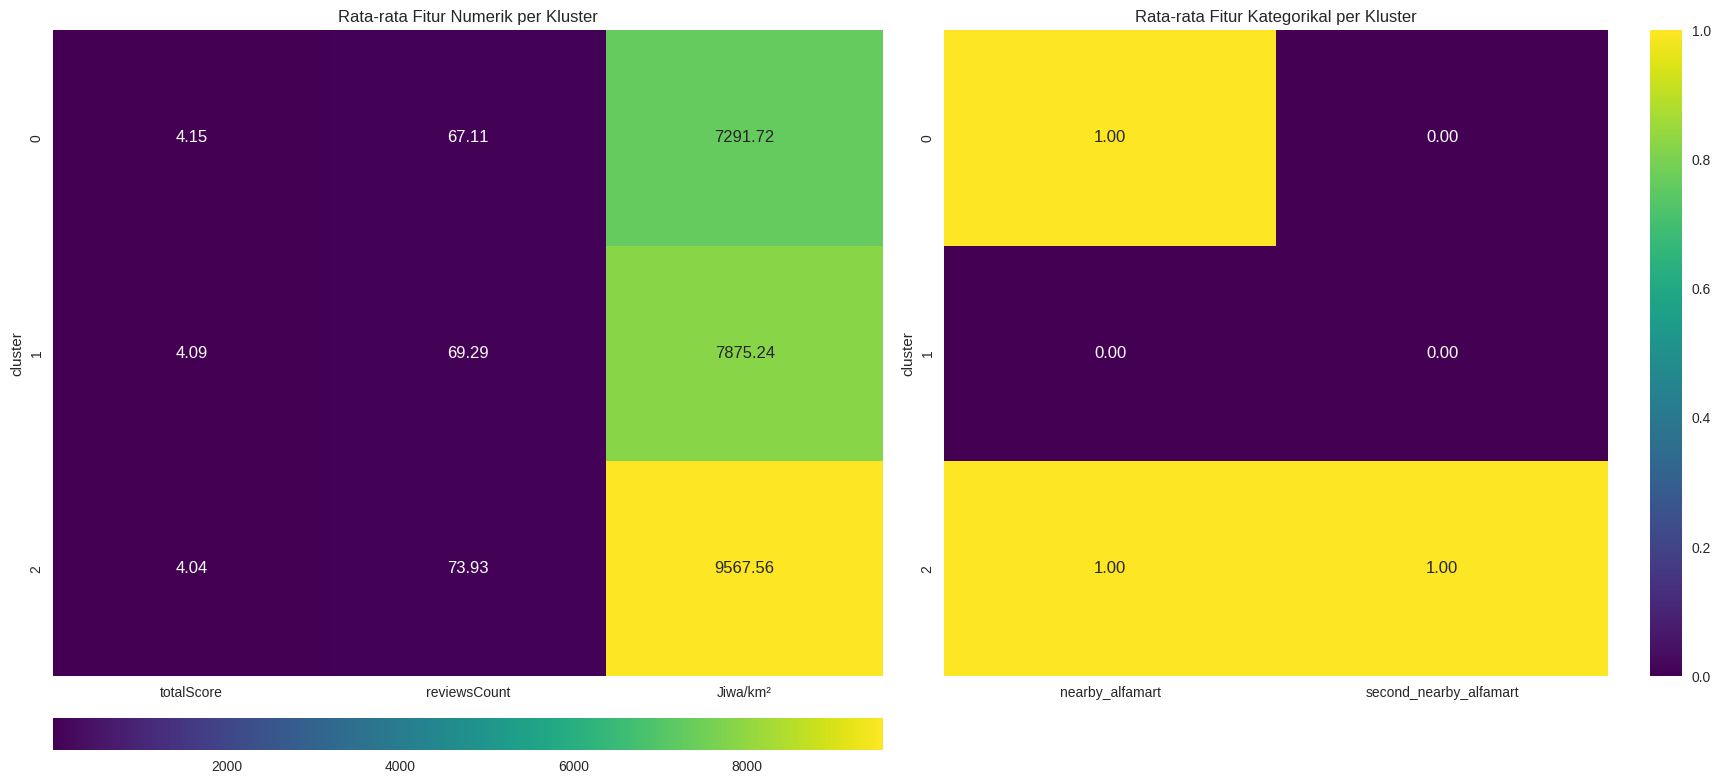

In [41]:
numerical_features = ['totalScore', 'reviewsCount', 'Jiwa/km²']
categorical_features = ['nearby_alfamart', 'second_nearby_alfamart']

numerical_means = clustered_df.groupby('cluster')[numerical_features].mean()
categorical_means = clustered_df.groupby('cluster')[categorical_features].mean()

# menentukan figure dan gridspec
fig = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.05], width_ratios=[1, 1])

# menentukan axes untuk heatmaps dan colorbar
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
cax = plt.subplot(gs[1, 0])

# Heatmap untuk numerical features dengan colorbar
sns.heatmap(numerical_means, annot=True, cmap='viridis', fmt=".2f", ax=ax0, cbar_ax=cax,
            cbar_kws={'orientation': 'horizontal'})
ax0.set_title('Rata-rata Fitur Numerik per Kluster')

# Heatmap untuk categorical features (nilai binary sebagai numerical)
sns.heatmap(categorical_means, annot=True, cmap='viridis', fmt=".2f", ax=ax1)  # Use .2f for formatting
ax1.set_title('Rata-rata Fitur Kategorikal per Kluster')

# atur layout
plt.tight_layout()
plt.show()

In [42]:
# membuat parallel coordinates plot
fig = px.parallel_coordinates(clustered_df, color='cluster',
                              title='Parallel Coordinates Plot of Clusters',
                              labels={'totalScore':'Total Score', 'reviewsCount':'Review Count', 'Jiwa/km²':'Population Density'},
                              width=800,  # Adjust width as needed
                              height=600) # Adjust height as needed

fig.show()

In [43]:
# membuat parallel categories plot
fig = px.parallel_categories(clustered_df, color='cluster',
                             title='Parallel Categories Plot of Clusters',
                             labels={'totalScore':'Total Score', 'reviewsCount':'Review Count', 'Jiwa/km²':'Population Density'},
                             width=800,  # Adjust width as needed
                             height=600)  # Adjust height as needed

fig.show()

# 4. Knowledge Presentation
Menampilkan hasil analisis dalam bentuk visualisasi dan tabel untuk memudahkan interpretasi.

In [44]:
# scatter plot dengan titik koordinat
fig = px.scatter(clustered_df, x="location/lng", y="location/lat", color="cluster", hover_data=['title', 'totalScore', 'reviewsCount','Jiwa/km²'])
fig.update_layout(title="Interactive Scatter Plot of Indomaret Locations by Cluster")
fig.show()

#### Interpretasi

Analisis clustering yang dilakukan terhadap 317 toko Indomaret di wilayah studi berhasil mengelompokkan toko-toko tersebut menjadi 3 cluster utama berdasarkan karakteristiknya. Pengelompokkan ini didasarkan pada beberapa faktor penting seperti kepadatan penduduk di sekitar toko, jumlah dan kualitas ulasan yang diterima, dan keberadaan toko kompetitor (Alfamart) di dekatnya.

Berikut adalah gambaran umum dari masing-masing cluster

**Cluster 0:**
> * Rating: 4.1
* Jumlah Ulasan: 67.1
* Populasi: 7291.7
* Kompetitor: 1

Lokasi Strategis, Potensial, dan Minim Kompetitor: Toko-toko dalam cluster ini cenderung berada di lokasi yang strategis dengan kepadatan penduduk menengah dan memiliki potensi pertumbuhan yang baik. Keunggulan utama cluster ini adalah minimnya keberadaan kompetitor (Alfamart) di sekitar toko. Jumlah ulasan yang diterima toko-toko dalam cluster ini relatif tinggi, sehingga rating atau totalScore yang didapatkan cenderung lebih dapat dipercaya dan mencerminkan kualitas toko yang sebenarnya.
Rekomendasi: Cluster 0 sangat ideal bagi calon pelanggan yang mencari toko Indomaret dengan lokasi yang nyaman, tidak terlalu ramai, minim persaingan, dan memiliki reputasi baik berdasarkan ulasan pelanggan.

**Cluster 1:**
> * Rating: 4.0
* Jumlah Ulasan: 69.2
* Populasi: 7875.2
* Kompetitor: 0

Lokasi di Daerah Sepi, Minim Kompetitor, dan Berpotensi Dikembangkan: Cluster 1 mewakili toko-toko yang berada di daerah dengan kepadatan penduduk relatif rendah dan minim keberadaan kompetitor. Jumlah ulasan yang diterima toko-toko di cluster ini mungkin tidak sebanyak cluster lain, sehingga perlu diperhatikan lebih lanjut untuk memastikan kualitas dan reputasi toko.
Rekomendasi: Cluster 1 cocok bagi calon pelanggan yang menginginkan suasana berbelanja yang lebih tenang dan tidak terlalu ramai. Potensi pengembangan di area ini juga tinggi. Namun, calon pelanggan disarankan untuk lebih teliti dalam melihat ulasan toko sebelum memutuskan untuk berbelanja.

**Cluster 2:**
> * Rating: 4.0
* Jumlah Ulasan: 73.9
* Populasi: 9567.5
* Kompetitor: 2

Lokasi Ramai dan Persaingan Tinggi: Toko-toko dalam cluster ini berada di daerah dengan kepadatan penduduk yang tinggi dan tingkat persaingan yang ketat. Jumlah ulasan yang diterima toko-toko di cluster ini juga cenderung lebih banyak. Meskipun memiliki banyak ulasan, perlu diperhatikan bahwa rating atau totalScore toko-toko di cluster ini bisa dipengaruhi oleh ulasan negatif, meskipun jumlahnya sedikit. Calon pelanggan disarankan untuk membaca ulasan secara seksama, terutama ulasan negatif, untuk mendapatkan gambaran yang lebih lengkap tentang kualitas toko.
Rekomendasi: Cluster 2 menjadi pilihan yang tepat bagi calon pelanggan yang menyukai suasana ramai dan beragam pilihan produk. Tingkat persaingan yang tinggi di area ini mendorong toko untuk memberikan pelayanan dan penawaran terbaik bagi pelanggan. Namun, calon pelanggan perlu lebih cermat dalam memilih toko dan mempertimbangkan ulasan pelanggan untuk menghindari pengalaman berbelanja yang kurang memuaskan.
Kesimpulan:

Dengan memahami karakteristik masing-masing cluster, termasuk informasi tentang jumlah dan kualitas ulasan, calon pelanggan dapat memilih toko Indomaret yang paling sesuai dengan preferensi dan kebutuhan mereka. Informasi ini dapat membantu calon pelanggan dalam menemukan lokasi toko yang strategis, nyaman, dan sesuai dengan ekspektasi mereka. Jumlah ulasan dan rating toko menjadi faktor penting dalam pengambilan keputusan, karena mencerminkan tingkat kepercayaan dan reputasi toko di mata pelanggan.

In [45]:
display(numerical_means)

,totalScore,reviewsCount,Jiwa/km²
cluster,,,
0,4.145902,67.106557,7291.721311
1,4.085714,69.291667,7875.238095
2,4.040741,73.925926,9567.555556


In [46]:
display(categorical_means)

,nearby_alfamart,second_nearby_alfamart
cluster,,
0,1.0,0.0
1,0.0,0.0
2,1.0,1.0
